<a href="https://colab.research.google.com/github/AmtulYasmeen/Projects-Done/blob/Pytorch/pytorch_fundamentals_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('pytorch-fundamentals-new')
jovian.set_colab_id('1GIRXyqVwd--RgaAIYuooP5VRZETMcCGn')

In [ ]:
!pip install jovian --upgrade --quiet

#Pytorch tensors operations

In [ ]:
import torch
print(torch.__version__)

1.9.0+cu102


In [ ]:
torch.get_default_dtype()

torch.float32

In [ ]:
torch.set_default_dtype(torch.float64)

In [ ]:
torch.get_default_dtype()

torch.float64

#diff ways of creating pytorch tensors

In [ ]:
# instantiate torch.Tensor object = torch.FloatTensor() default tensor type
tensor_arr = torch.Tensor([[1,2,3], [4,5,6]])
tensor_arr

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
torch.is_tensor(tensor_arr)

True

In [ ]:
# no of elements in a particular tensor, irrespective of size and shape
torch.numel(tensor_arr)

6

In [ ]:
# initialise a tensor by indicating only shape and not providing anh elements 
# resulting tensor object is uninitialised
# memory is allocated but random elements will be given
tensor_unintialised = torch.Tensor(2,2)

In [ ]:
# create a tensor of particular type, not default type
tensor_int = torch.Tensor([5,3]).type(torch.IntTensor)
tensor_int

# cpu and gpu
# torch.IntTensor and torch.cuda.IntTensor


tensor([5, 3], dtype=torch.int32)

In [ ]:
# other way to instantiate a tensor
# use type object directly
tensor_short = torch.ShortTensor([[1.0, 2.0, 3.0]])
tensor_short

tensor([[1, 2, 3]], dtype=torch.int16)

In [ ]:
# floating type tensor which occupies half  memory of each element as of float32
tensor_float = torch.tensor([1.0,2.0,3.0]).type(torch.half)
tensor_float

tensor([1., 2., 3.], dtype=torch.float16)

In [ ]:
# create a torch tensor and fill it with specific value and provide a shape
tensor_fill = torch.full((2,4), fill_value=10)
tensor_fill

tensor([[10, 10, 10, 10],
        [10, 10, 10, 10]])

In [ ]:
type(tensor_fill)

torch.Tensor

In [ ]:
tensor_of_ones = torch.ones([2,4], dtype= torch.int32)
tensor_of_ones

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.int32)

In [ ]:
# create another tensor of same shape as already existing tensor
tensor_of_zeroes = torch.zeros_like(tensor_of_ones)
tensor_of_zeroes

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
# 2d square matrix
tensor_eye = torch.eye(5)
tensor_eye

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [ ]:
# to know at what indices 
# the non-zero elements lie in an already instatiated tensor

non_zero = torch.nonzero(tensor_eye)
non_zero

tensor([[0, 0],
        [1, 1],
        [2, 2],
        [3, 3],
        [4, 4]])

In [ ]:
# make a copy of an existing tensor or numpy array or list in order to create a tensor
# small case t in tensor
i = torch.tensor([[0,1,1],[2,2,0]])

v = torch.tensor([3,4,5], dtype= torch.float32)

In [ ]:
# sparse tensors ar constructed in coordinate format
# with non-zero elements at indices with the values provided 
# tensor i specifies indices and tensor v specifies values contain in sparse tensor

# every pytorch tensor has .data variable .data variable which can b used to access the underlying matrix
sparse_tensor = torch.sparse_coo_tensor(i,v,[2,5])
sparse_tensor.data



tensor(indices=tensor([[0, 1, 1],
                       [2, 2, 0]]),
       values=tensor([3., 4., 5.]),
       size=(2, 5), nnz=3, dtype=torch.float32, layout=torch.sparse_coo)

In [ ]:
# index 0--> value 3, index 1--> value 4, index 2--> value 5, 

#Tensor operations

In [ ]:
# tensor with random nums
initial_tensor = torch.rand(2,3)
initial_tensor

tensor([[0.8603, 0.8784, 0.9117],
        [0.4960, 0.6187, 0.7070]])

In [ ]:
# any tensor func which performs an operation and have an _ suffix
# it modifies the tensor in-place
initial_tensor.fill_(10)

tensor([[10., 10., 10.],
        [10., 10., 10.]])

In [ ]:
# there is no corresponding outplace func for fill 
# initial_tensor.fill(10) #--> throws an error

In [ ]:
# addition ... out of place operation
new_tensor = initial_tensor.add(5)
new_tensor

tensor([[15., 15., 15.],
        [15., 15., 15.]])

In [ ]:
# addition -- in-place
initial_tensor.add_(5)
initial_tensor

tensor([[15., 15., 15.],
        [15., 15., 15.]])

In [ ]:
# sqrt in-place
new_tensor.sqrt_()
new_tensor

tensor([[3.8730, 3.8730, 3.8730],
        [3.8730, 3.8730, 3.8730]])

# chunking and concatenating

In [ ]:
# generate evenly spaced nums btw 2 given nums (lower and upper bound) with steps given
x = torch.linspace(start=0.1, end=10.0, steps=15)
x  #1d tensor with 15 elements

tensor([ 0.1000,  0.8071,  1.5143,  2.2214,  2.9286,  3.6357,  4.3429,  5.0500,
         5.7571,  6.4643,  7.1714,  7.8786,  8.5857,  9.2929, 10.0000])

In [ ]:
# dividing the ele into chunks 
# 3-- num of chunks
# 0-- dim along which the seperation occurs
tensor_chunk = torch.chunk(x,3,0)
tensor_chunk #contain tuple of chunks

(tensor([0.1000, 0.8071, 1.5143, 2.2214, 2.9286]),
 tensor([3.6357, 4.3429, 5.0500, 5.7571, 6.4643]),
 tensor([ 7.1714,  7.8786,  8.5857,  9.2929, 10.0000]))

In [ ]:
# concat tensors
tensor1 = tensor_chunk[0]
tensor2 = tensor_chunk[1]
tensor3 = torch.tensor([3.0,4.0,5.0])
# tuple of tensors to be concatenated and dim along which conct occurs
concat_tensor = torch.cat((tensor1,tensor2, tensor3), 0)
concat_tensor

tensor([0.1000, 0.8071, 1.5143, 2.2214, 2.9286, 3.6357, 4.3429, 5.0500, 5.7571,
        6.4643, 3.0000, 4.0000, 5.0000])

#slicing operations

In [ ]:
random_tensor = torch.Tensor([[10,8,30], [40,5,6], [12,2,21]])
random_tensor

tensor([[10.,  8., 30.],
        [40.,  5.,  6.],
        [12.,  2., 21.]])

In [ ]:
# indexing into a pytorch tensor gives us a tensor as result
random_tensor[0,1]

tensor(8.)

In [ ]:
random_tensor[1:,1:]

tensor([[ 5.,  6.],
        [ 2., 21.]])

In [ ]:
# Size func
random_tensor.size()

torch.Size([3, 3])

#view of tensor

In [ ]:
# to view a tensor in a diff shape : use view func
# view func doesnt create new tensor,it uses the same memory as original
# any change in originl causes change in view
# diff shape must be compalible with the original shape
resize_tensor =random_tensor.view(9)
resize_tensor

tensor([10.,  8., 30., 40.,  5.,  6., 12.,  2., 21.])

In [ ]:
# resize_tensor =random_tensor.view(-1, 6)
# resize_tensor
# throws n error as not compatible

In [ ]:
resize_tensor.size()

torch.Size([9])

In [ ]:
# observing the original tensor n view share same memory
random_tensor[2,2] = 100.0
resize_tensor

tensor([ 10.,   8.,  30.,  40.,   5.,   6.,  12.,   2., 100.])

In [ ]:
random_tensor

tensor([[ 10.,   8.,  30.],
        [ 40.,   5.,   6.],
        [ 12.,   2., 100.]])

# shape of tensor

In [ ]:
# shape of tensor
random_tensor.shape

torch.Size([3, 3])

#unsqueeze

In [ ]:
# change the shape of a tensor by removing or adding dimension
# using squeeze and unsqueeze func

# adding additional dimension using unsqueeze func
# adding new dim at index 2 ths inner most dim
tensor_unsqueeze = torch.unsqueeze(random_tensor, 2)
tensor_unsqueeze

tensor([[[ 10.],
         [  8.],
         [ 30.]],

        [[ 40.],
         [  5.],
         [  6.]],

        [[ 12.],
         [  2.],
         [100.]]])

In [ ]:
tensor_unsqueeze.shape
# 1 is the extra dim which we unsqueezed

torch.Size([3, 3, 1])

#transpose

In [ ]:
# swapping rows to cols and vice versa
initial_tensor

tensor([[15., 15., 15.],
        [15., 15., 15.]])

In [ ]:
tensor_transpose = torch.transpose(initial_tensor, 0,1)
tensor_transpose

tensor([[15., 15.],
        [15., 15.],
        [15., 15.]])

In [ ]:
tensor_transpose.shape

torch.Size([3, 2])

#sorting tensor

In [ ]:
random_tensor 

tensor([[ 10.,   8.,  30.],
        [ 40.,   5.,   6.],
        [ 12.,   2., 100.]])

In [ ]:
# can provide the dim along which elements need to b sorted 
# by default it chooses the last dim of the tensor
# it returns sorted tensor and sorted index values
sorted_tensor, sorted_indices = torch.sort(random_tensor)


In [ ]:
sorted_tensor

tensor([[  8.,  10.,  30.],
        [  5.,   6.,  40.],
        [  2.,  12., 100.]])

In [ ]:
# it gives original index positions in sorted order
sorted_indices

tensor([[1, 0, 2],
        [1, 2, 0],
        [1, 0, 2]])

#matrix operations

In [ ]:
tensor_float = torch.FloatTensor((-1.1,-2.2, 3.3))
tensor_float 

tensor([-1.1000, -2.2000,  3.3000], dtype=torch.float32)

In [ ]:
# abs value
tensor_abs = torch.abs(tensor_float)
tensor_abs

tensor([1.1000, 2.2000, 3.3000], dtype=torch.float32)

In [ ]:
rand1 = torch.abs(torch.randn(2,3))
rand2 = torch.abs(torch.randn(2,3))

In [ ]:
add1 = rand1 +rand2
add1

tensor([[2.7424, 0.4985, 3.3578],
        [3.5512, 0.5360, 2.5355]])

In [ ]:
add2 = torch.add(rand1,rand2)
add2

tensor([[2.7424, 0.4985, 3.3578],
        [3.5512, 0.5360, 2.5355]])

In [ ]:
tensor = torch.Tensor([[-1,-2,-3], [1,2,3]])
tensor

tensor([[-1., -2., -3.],
        [ 1.,  2.,  3.]])

In [ ]:
# element-wise div of 1st parameter with 2nd parameter 
tensor_div = torch.div(tensor, tensor + 0.3)
tensor_div

tensor([[1.4286, 1.1765, 1.1111],
        [0.7692, 0.8696, 0.9091]])

In [ ]:
# elem wise mul
tensor_mul = torch.mul(tensor, tensor)
tensor_mul

tensor([[1., 4., 9.],
        [1., 4., 9.]])

In [ ]:
# clamping tensor values within in min and max range
tensor_clamp = torch.clamp(tensor,  min= -0.2, max = 2)
tensor_clamp

tensor([[-0.2000, -0.2000, -0.2000],
        [ 1.0000,  2.0000,  2.0000]])

#matrix operations

In [ ]:
t1 = torch.Tensor([1,2])
t2 = torch.Tensor([10,20])


In [ ]:
# dot product
dot_product = torch.dot(t1,t2)
dot_product # a scalar

tensor(50.)

In [ ]:
matrix = torch.Tensor([[1,2,3], [4,5,6]])
vector = torch.Tensor([0,1,2])

In [ ]:
# working with multi dim tensor and a vector
matrix_vector = torch.mv(matrix, vector)
matrix_vector

tensor([ 8., 17.])

In [ ]:
another_matrix = torch.Tensor([[10,30],[20,0], [0,50]])


In [ ]:
# matrix multiplication
matrix_mul = torch.mm(matrix, another_matrix)
matrix_mul

tensor([[ 50., 180.],
        [140., 420.]])

In [ ]:
# argmax .. finds the largest element index along a particular dim
torch.argmax(matrix_mul, dim = 1)

tensor([1, 1])

In [ ]:
# argmix
torch.argmin(matrix_mul, dim =1)

tensor([0, 0])

# Conversion btw pytorch and numpy

In [ ]:
import numpy as np
import torch

In [ ]:
tensor = torch.rand(4,3)
tensor

tensor([[0.7431, 0.5955, 0.4478],
        [0.6964, 0.8372, 0.5812],
        [0.8693, 0.2454, 0.1612],
        [0.4285, 0.4238, 0.3469]])

In [ ]:
type(tensor)

torch.Tensor

In [ ]:
# torch tensors are numpy arrays with the ability to work on gpu
numpy_from_tensor = tensor.numpy()
numpy_from_tensor

array([[0.74314198, 0.59546132, 0.4477522 ],
       [0.69643879, 0.83716432, 0.58120935],
       [0.86929629, 0.24541388, 0.16115797],
       [0.42854747, 0.42375822, 0.34692959]])

In [ ]:
type(numpy_from_tensor)

numpy.ndarray

In [ ]:
torch.is_tensor(tensor)

True

In [ ]:
torch.is_tensor(numpy_from_tensor)

False

In [ ]:
# original pytorch tensor and the numpy array created from it share 
# the same memory
# change in tensor is reflected in numpy array
# its the same data in diff objects

In [ ]:
# doing vice versa
numpy_arr = np.array([[1.0,2.0,3.0], [10.0,20.0,30.0],[100.0, 200.0,300.0]])
numpy_arr


array([[  1.,   2.,   3.],
       [ 10.,  20.,  30.],
       [100., 200., 300.]])

In [ ]:
tensor_from_numpy = torch.from_numpy(numpy_arr)
tensor_from_numpy

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
# again the torch tensor and the original numpy array share the same memory
tensor_from_numpy[0]= 1
tensor_from_numpy

tensor([[  1.,   1.,   1.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
numpy_arr

array([[  1.,   1.,   1.],
       [ 10.,  20.,  30.],
       [100., 200., 300.]])

#other ways to convert numpy array to tensors

In [ ]:
np_array_one = np.array([4,8])
np_array_one

array([4, 8])

In [ ]:
# creating a tensor from numpy array using .as_tensor 
# it performs a copy if the data is not already a tensor or else copy is avoided
# if data is already a tensor with same dtype n device then no copy is performed
# and a new tensor is returned with same computational graph
tensor_from_array_one = torch.as_tensor(np_array_one)
tensor_from_array_one

tensor([4, 8])

In [ ]:
np_array_one[1] = 5
np_array_one

array([4, 5])

In [ ]:
tensor_from_array_one

tensor([4, 5])

In [ ]:
# to make the copy of data while creating a tensor from numpy array
np_array_2 = np.array([2,2])
np_array_2

array([2, 2])

In [ ]:
tensor_from_array_2 = torch.tensor(np_array_2)
tensor_from_array_2

tensor([2, 2])

In [ ]:
# make a change to original numpy array
np_array_2[1] = 4
np_array_2

array([2, 4])

In [ ]:
# no change in the torch tensor as copy is made 
tensor_from_array_2

tensor([2, 2])

#Pytorch , Cuda, and GPU

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# to initialise the pytorchs cuda state : required when interating with its C api
torch.cuda.init()

In [ ]:
# keeps track of currently selected GPU device and 
# all cuda tensors will be  created on that device 
torch.cuda.current_device()
# returns index of device

0

In [ ]:
# count num of cuda enabled devices available for pytorch
torch.cuda.device_count()

1

In [ ]:
# to change which device to use , pytorch uses device context manager

In [ ]:
# func to monitor cuda memory occupied by tensor you we allocate
torch.cuda.memory_allocated()

0

In [ ]:
# to speed up thing and memory allocations,  pytorch uses caching memory allocator
# it allows fast memory deallocation without device synchonization
torch.cuda.memory_cached()


/usr/local/lib/python3.7/dist-packages/torch/cuda/memory.py:375: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  FutureWarning)


0

In [ ]:
cuda = torch.device('cuda')
cuda
# 'cuda' refers to default cuda device used by pytorch
# this can b changed using DCM

device(type='cuda')

In [ ]:
# indexing of devices
cuda0 = torch.device('cuda')

In [ ]:
# when a tensor is created with specifing cuda device, 
# its by default created on cpu

In [ ]:
x = torch.tensor([10.0, 20.0])
x

tensor([10., 20.])

In [ ]:
# to create a tensor on gpt, explicitly specify cuda device parameter
# it by default uses the cuda device at index 0, change the device as  needed
x_default = torch.tensor([10.0,20.0], device = cuda)
x_default

tensor([10., 20.], device='cuda:0')

In [ ]:
# creating a tensor on non existing cuda device throws an error

In [ ]:
# to create a copy of the tensor in cuda memory
y = x.cuda() # x variable is on cpu and not on gpu
y # created on cuda0

tensor([10., 20.], device='cuda:0')

In [ ]:
# if the tensor is already in cuda memory and on correct device , 
# no copy is performed

In [ ]:
# to change the default device for pytorch using context manager
print('outside with context' , torch.cuda.current_device())
with torch.cuda.device(0):
  print('inside with context ', torch.cuda.current_device())
print('outside with context again', torch.cuda.current_device())

outside with context 0
inside with context  0
outside with context again 0


In [ ]:
with torch.cuda.device(0):
  a = torch.tensor([10.0, 20.0]) #created on cpu
  a0 = torch.tensor([10.0, 20.0], device = cuda0) #on cuda0
  a1 = torch.tensor([10.0,20.0], device=cuda) #on cuda1 default device in the context


In [ ]:
# # cross gpu operations are not supported in pytorch by default
# # to expiclitly move a tensor from 1 gpu to another we need to perform copy
# x.cuda #1 type
# torch.Tensor.to() #2 type
# # used to perform tensor dtype or device conversion

# # a0 is on cuda0
# # b1 has been created on cuda1
# b1 = a0.to(device='cuda1')

# # a copy has been made using to func

# # try to perform operation on tensor from to diff devices
# # a on cpu , a0 on cuda0
# sum_a = a + a0
# # error

In [ ]:
# chk memory allocated
torch.cuda.memory_allocated()


2048

In [ ]:
torch.cuda.memory_cached()

/usr/local/lib/python3.7/dist-packages/torch/cuda/memory.py:375: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  FutureWarning)


2097152

In [ ]:
# free up unused cache memory within caching allocator
torch.cuda.empty_cache()

In [ ]:
torch.cuda.memory_cached()
# result is same coz we donot have any unused memory in our cache

/usr/local/lib/python3.7/dist-packages/torch/cuda/memory.py:375: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  FutureWarning)


2097152

In [ ]:
# to create new tensor on same device , 
# use pytorch operations prefixed with, new_
# it creates tensor with same datatype as the original on same device
preserve_context = x.new_full([2,2], fill_value = 1.1)
preserve_context

tensor([[1.1000, 1.1000],
        [1.1000, 1.1000]])

In [ ]:
preserve_context0 = x.new_full([2,2], fill_value = 1.1)
preserve_context0

tensor([[1.1000, 1.1000],
        [1.1000, 1.1000]])

#working with gradients using Autograd library

In [ ]:
# calculation of gradients in pytorch using automatic differentiation is  done by autograd
# back propagation is implemented using a technique called
# reverse auto differentiation

In [ ]:
import torch

In [ ]:
tensor1 = torch.Tensor([[1,2,3], [4,5,6]])
tensor1


tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
tensor2 = torch.Tensor([[7,8,9],[10,11,12]])
tensor2

tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])

In [ ]:
# every tensor created in pytorch has requires_grad property
# when True this tracks computations for a tensor in the forwaed phase and 
# will calc gradients for this tensor in the backward phase
# gradients are calc wrt scalr value Loss
tensor1.requires_grad # default value is set to false

False

In [ ]:
tensor2.requires_grad

False

In [ ]:
# to enable tracking history on the tensor
tensor1.requires_grad_() # updates the requires_grad property in place


tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)

In [ ]:
tensor1.requires_grad

True

In [ ]:
tensor2.requires_grad


False

In [ ]:
# gradients calc by Autodiff wrt any tensor is present in grad matrix
print(tensor1.grad) # no grad are available yet as we dint use 
# this tensor in computation graph, dint perform FP or BP


None


In [ ]:
# computation graph in pytorch is made up of tensors and functions
# directed acyclic comp graph : with tensors as nodes and functions as transformations performed along the edges
# every func has a grad func used to create that function

In [ ]:
# performing operations on tensor1 to set up comp graph
output_tensor = tensor1  * tensor2
# creating a new tensor using an operation , the requires_grad property 
# for the resulting tensor is based on the input tensors used to create it



In [ ]:
output_tensor.requires_grad 
# its true as input tensor1 had requires_grad as true


True

In [ ]:
print(output_tensor.grad
      )
# it also has grad property use to store gradients
# there r no grads as v havnt made any backward pass

None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  """Entry point for launching an IPython kernel.


In [ ]:
# this soutput tensor will have a grad function
# coz we used a specific multiplicaton operation to create this output tensor

print(output_tensor.grad_fn)
# MulBackward0 is the grad func associated with this output tensor
# user created tensor such as tensor1 and tensor2 have no grad func associated

In [ ]:
# creating another outout func
output_tensor = (tensor1 * tensor2).mean()
print(output_tensor.grad_fn)
# the grad func reference the last function ued to create that tensor,
# here MeanBackward0, when many operations are performed

In [ ]:
# tesnor1 has been part of multiple computation graphs,
# but no grad is associated with it, coz v havent performed backward pass
print(tensor1.grad)

None


In [ ]:
# to begin backward pass through our computation graph
output_tensor.backward()
# gradient calc ie our vector of partial derivatives will be calc only 
# when we call
# backward function on an output


In [ ]:
# now we will have gradients for tensor1
print(tensor1.grad)
# these gradients are partial derivatives for parameters in tensor1 calc wrt output tensor


tensor([[1.1667, 1.3333, 1.5000],
        [1.6667, 1.8333, 2.0000]])


In [ ]:
# since gradients are partial derivts wrt every value within tensor1,
# the shape of the gradient will exactly match the shape of the tensor itself
tensor1.grad.shape , tensor1.shape


(torch.Size([2, 3]), torch.Size([2, 3]))

In [ ]:
print(tensor2.grad) # as requires_grad was not set to True

None


In [ ]:
print(output_tensor.grad)
# no grad associated with output tensor as its the tensor wrt to which we calculated
# partial derivatives to get gradients

None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  """Entry point for launching an IPython kernel.


In [ ]:
# the requires_grad property is propagated from input tensors to the result tensors
new_tensor = tensor1 * 3
print(new_tensor.requires_grad)


True


In [ ]:
new_tensor

tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]], grad_fn=<MulBackward0>)

In [ ]:
# if requires_grad is True , tracking history is enabled
# to disable autograd from tracking history on tensors with requires_grad = True
# use torch.no_grad() to achieve that
# any computation performed or tensor created under with block will have tracking histroy turned off
# n requires_grad set to False
with torch.no_grad():
  new_tensor = tensor1 * 3
  print('new_tensor =', new_tensor)
  print('requires_grad for tensor1 = ', tensor1.requires_grad)
  print('requires_grad for tensor2 = ', tensor2.requires_grad)
  print('requires_grad for new_tensor = ', new_tensor.requires_grad)





new_tensor = tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
requires_grad for tensor1 =  True
requires_grad for tensor2 =  False
requires_grad for new_tensor =  False


# python functions and decorator for enabling and disabling gradients 

In [ ]:
def calculate(t):
  return t * 2

In [ ]:
# with @torch.no_grad() decorator , gradients will not be enabled and
# history tracking will be turned off, even if the requires_grad property is set to True

@torch.no_grad()
def calculate_with_no_grad(t):
  return t * 2
  

In [ ]:
# invoking func 1
result_tensor = calculate(tensor1)
result_tensor

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]], grad_fn=<MulBackward0>)

In [ ]:
result_tensor.requires_grad

True

In [ ]:
# invoking func2
result_tensor_no_grad = calculate_with_no_grad(tensor1)
result_tensor_no_grad

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

In [ ]:
result_tensor_no_grad.requires_grad
# even though the input tensor has requires_grad set to True

False

In [ ]:
# and also we can enable explicit history tracking within a torch.no_grad block
with torch.no_grad():
  new_tensor_no_grad = tensor1 * 3
  print('new_tensor_no_grad = ', new_tensor_no_grad)
  with torch.enable_grad():
    new_tensor_grad = tensor1 *3
    print('new_tensor_grad = ', new_tensor_grad)
    

new_tensor_no_grad =  tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
new_tensor_grad =  tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]], grad_fn=<MulBackward0>)


In [ ]:
tensor_one = torch.tensor([[1.0,2.0],[3.0,4.0]],
                          requires_grad = True)
tensor_one

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [ ]:
tensor_two = torch.Tensor([[5.0,6.0], [7.0,8.0]])
tensor_two

tensor([[5., 6.],
        [7., 8.]])

In [ ]:
tensor_two.requires_grad_() #turns requires_grad to True


tensor([[5., 6.],
        [7., 8.]], requires_grad=True)

In [ ]:
# setting forward pass
final_tensor = (tensor_one * tensor_two).mean()
final_tensor

tensor(17.5000, grad_fn=<MeanBackward0>)

In [ ]:
final_tensor.requires_grad

True

In [ ]:
# we have only performed forward pass on our comp graps,
# there are no gradients associated with tensor_one or tensor_two yet
# histroy tracking is enabled


In [ ]:
# backward pass where gradients are calculated
final_tensor.backward()

In [ ]:
print(tensor_one.grad)

tensor([[1.2500, 1.5000],
        [1.7500, 2.0000]])


In [ ]:
print(tensor_two.grad)
# gradients are calc wrt to final_tensor

tensor([[0.2500, 0.5000],
        [0.7500, 1.0000]])


In [ ]:
# to detach a tensor from the computation graph 
detached_tensor = tensor_one.detach()
detached_tensor # detached tensor will always have requires_grad set to False


tensor([[1., 2.],
        [3., 4.]])

In [ ]:
tensor_one 

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [ ]:
# using original tensor tensor_one and detached tensor in a computation
mean_tensor = (tensor_one + detached_tensor).mean()
mean_tensor.backward()

In [ ]:
tensor_one.grad # gradients have been calculated

tensor([[1.5000, 1.7500],
        [2.0000, 2.2500]])

In [ ]:
print(detached_tensor.grad)

None


#autograd with variables

#building a linear model with autograd

In [ ]:
# simple NN with single neuron and no activation func
# performing linear regression

import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
X_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], 
                     [8.9], [5.2], [8.59], [2.1], [8] , 
                     [10], [4.5], [6], [4]],
                    dtype = np.float32)

Y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], 
                     [2.6], [1.96], [3.53], [1.76], [3.2] , 
                     [3.5], [1.6], [2.5], [2.2]], 
                    dtype = np.float32)

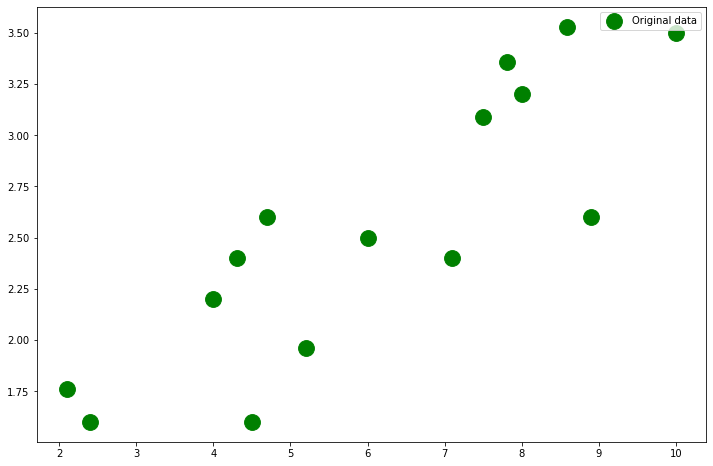

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_train, Y_train, label='Original data', s=250, c='g')
plt.legend()
plt.show()

In [ ]:
import torch

In [ ]:
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)

In [ ]:
# getting tensors from numpy arrays
x_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(Y_train)
print('requires_grad for x_train :', x_train.requires_grad)
print('requires_grad for y_train "', y_train.requires_grad)


requires_grad for x_train : False
requires_grad for y_train " False


torch.Tensor

In [ ]:
# set up variables for 1 neuron
input_size =1
hidden_size = 1
output_size = 1


In [ ]:
# not using pytorch build in layers , instead constructing one manually
w1 = torch.rand(input_size,
                hidden_size,
                dtype = torch.float32,
                requires_grad = True)
w1.shape

torch.Size([1, 1])

In [ ]:
w2 = torch.rand(hidden_size,
                output_size,
                dtype = torch.float32,
                requires_grad = True)
w2.shape

torch.Size([1, 1])

In [ ]:
learning_rate = 1e-6

In [ ]:
for iter in range(1,3000):
  # forward pass
  y_pred = x_train.mm(w1).mm(w2)
  loss = (y_pred - y_train).pow(2).sum()

  if iter % 50 == 0:
    print(iter, loss.item())
  # backward pass
  loss.backward()
  # gradient update
  # gradients calc for w1 and w2 wrt to mse loss, are stored in w1.grad and w2.grad
  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    # we zero out the existing gradients on both weight tensors
    # and calc the gradients afresh in the next backward pass
    w1.grad.zero_()
    w2.grad.zero_()


50 15.831515312194824
100 15.039362907409668
150 14.289177894592285
200 13.57991886138916
250 12.910418510437012
300 12.279455184936523
350 11.68574333190918
400 11.127936363220215
450 10.604633331298828
500 10.114412307739258
550 9.655832290649414
600 9.227441787719727
650 8.827800750732422
700 8.45547103881836
750 8.109017372131348
800 7.787041664123535
850 7.488166332244873
900 7.211065769195557
950 6.954441547393799
1000 6.717036247253418
1050 6.497638702392578
1100 6.295088291168213
1150 6.108273983001709
1200 5.936145782470703
1250 5.777677059173584
1300 5.631927490234375
1350 5.497975826263428
1400 5.374971866607666
1450 5.262109279632568
1500 5.158631801605225
1550 5.063830375671387
1600 4.9770283699035645
1650 4.897607803344727
1700 4.824985027313232
1750 4.758620738983154
1800 4.698014259338379
1850 4.642690181732178
1900 4.592220783233643
1950 4.546199798583984
2000 4.5042572021484375
2050 4.466052532196045
2100 4.431265830993652
2150 4.399606227874756
2200 4.370800971984863

In [ ]:
print('w1: ', w1)
print('w2: ', w2)

w1:  tensor([[0.6898]], dtype=torch.float32, requires_grad=True)
w2:  tensor([[0.5612]], dtype=torch.float32, requires_grad=True)


In [ ]:
# perform prediction with the model weights
x_train_tensor = torch.from_numpy(X_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]], dtype=torch.float32)

In [ ]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8195],
        [0.9291],
        [2.9034],
        [2.7486],
        [1.6646],
        [3.0257],
        [3.4454],
        [2.0130],
        [3.3254],
        [0.8130],
        [3.0970],
        [3.8712],
        [1.7420],
        [2.3227],
        [1.5485]], dtype=torch.float32, grad_fn=<MmBackward>)

In [ ]:
# converting predicted values from tensor to numpy array for matplotlib visualization
# detaching the predicted values from comp graph n callin numpy func
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8194629],
       [0.9290875],
       [2.9033983],
       [2.7485504],
       [1.6646152],
       [3.0257282],
       [3.445366 ],
       [2.013023 ],
       [3.325359 ],
       [0.8129515],
       [3.0969582],
       [3.871198 ],
       [1.742039 ],
       [2.3227186],
       [1.5484791]], dtype=float32)

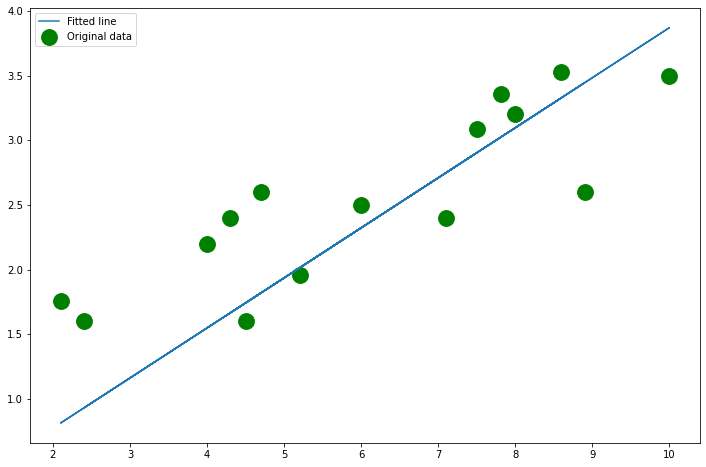

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label = 'Original data', s=250, c='g') 

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend() 

plt.show()

#building dynamiz computation graphs

In [ ]:
import torch

In [ ]:
x = torch.randn(1,10)
h = torch.randn(1,20)

In [ ]:
w_h = torch.randn(20,20)
w_x = torch.randn(20,10)

In [ ]:
h_prod = torch.mm(w_h, h.t())
x_prod = torch.mm(w_x, x.t())

In [ ]:
next_h = (h_prod + x_prod).tanh()

In [ ]:
loss = next_h.sum()

In [ ]:
# loss.backward()

In [ ]:
import graphviz

In [ ]:
!pip install hiddenlayer
import hiddenlayer

In [ ]:
import numpy as np
import torch
import torch.nn as nn


In [ ]:
w = torch.randn(6)
x = torch.tensor([10.0,10.0,10.0,10.0,10.0, 10.0])
b = torch.tensor(3)


In [ ]:
w

tensor([ 0.3888,  0.2749, -1.1279, -0.4060,  1.3909, -0.9594])

In [ ]:
y = (w * x) + b

In [ ]:
y

tensor([ 6.8884,  5.7491, -8.2788, -1.0596, 16.9091, -6.5943])

In [ ]:
w * x

tensor([  3.8884,   2.7491, -11.2788,  -4.0596,  13.9091,  -9.5943])

In [ ]:
import hiddenlayer as hl

In [ ]:
x_train.shape

torch.Size([15, 1])

In [ ]:
input = 1
output = 1
hidden = 100


In [ ]:
model = torch.nn.Sequential(torch.nn.Linear(input, hidden), 
                            torch.nn.Linear(hidden, output))

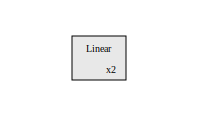

In [ ]:
hl.build_graph(model, torch.zeros([10,1]))

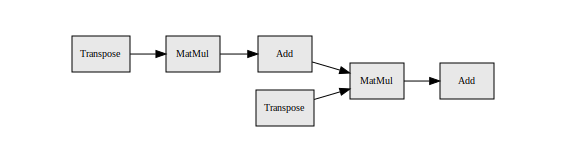

In [ ]:
hl.build_graph(model, torch.zeros([1]))

In [ ]:
model2 =torch.nn.Sequential(torch.nn.Linear(input,hidden),
                            torch.nn.Linear(hidden, hidden),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hidden, output))

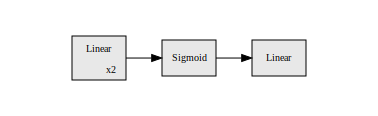

In [ ]:
hl.build_graph(model2, torch.zeros([10,1]))

In [ ]:
jovian.commit(project = 'pytorch_fundamentals_new') 

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/amtulyasmin/pytorch-fundamentals-new


'https://jovian.ai/amtulyasmin/pytorch-fundamentals-new'